In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# weight = df['weight']
# height_in_metres = df['height']/100
# bmi  = weight/(height_in_metres ** 2)
# (bmi > 25).astype(int)

df['overweight'] = ((df['weight']/((df['height']/100) ** 2)) > 25).astype(int)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [4]:
df['cholesterol'].value_counts()

cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64

In [5]:
df['cholesterol'].replace(to_replace=[1,[2,3]],value=[0,1], inplace=True)

In [6]:
df['cholesterol'].value_counts()

cholesterol
0    52385
1    17615
Name: count, dtype: int64

In [7]:
df['gluc'].value_counts()

gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64

In [8]:
df['gluc'].replace(to_replace=[1,[2,3]],value=[0,1], inplace=True)

In [9]:
df['gluc'].value_counts()

gluc
0    59479
1    10521
Name: count, dtype: int64

In [10]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [11]:
df1 = pd.melt(df, id_vars='cardio', value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

In [12]:
df1.head(10)

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
5,0,active,0
6,0,active,1
7,1,active,1
8,0,active,1
9,0,active,0


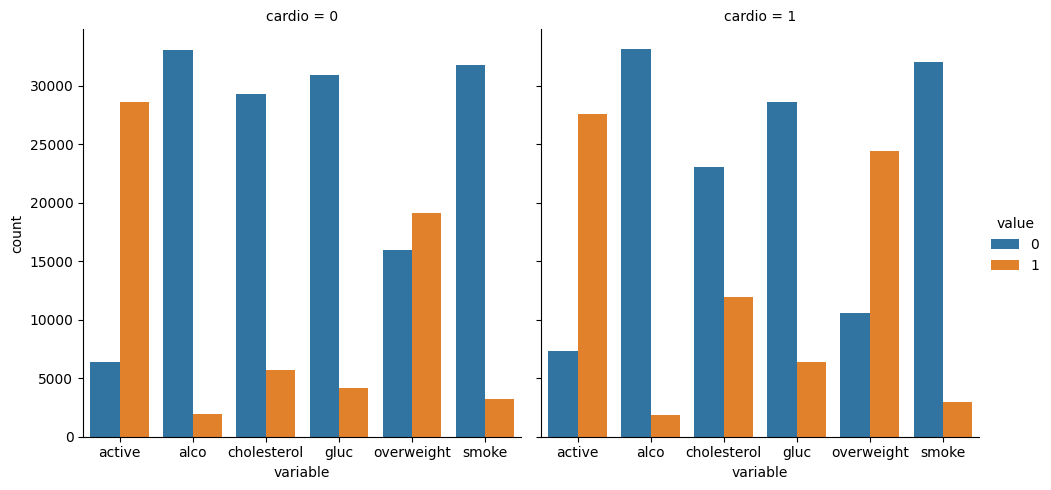

In [92]:
g = sns.catplot(x='variable', kind='count', data=df1, hue='value', col='cardio', )

In [67]:
g.axes

array([[<Axes: title={'center': 'cardio = 0'}, xlabel='variable', ylabel='count'>,
        <Axes: title={'center': 'cardio = 1'}, xlabel='variable', ylabel='total'>]],
      dtype=object)

In [14]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [15]:
df = df.loc[df['ap_lo']<=df['ap_hi']]

In [16]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [17]:
df = df.loc[(df['height']>=df['height'].quantile(0.025))&(df['height']<=df['height'].quantile(0.975))&(df['weight']>=df['weight'].quantile(0.025))&(df['weight']<=df['weight'].quantile(0.975))]

In [18]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


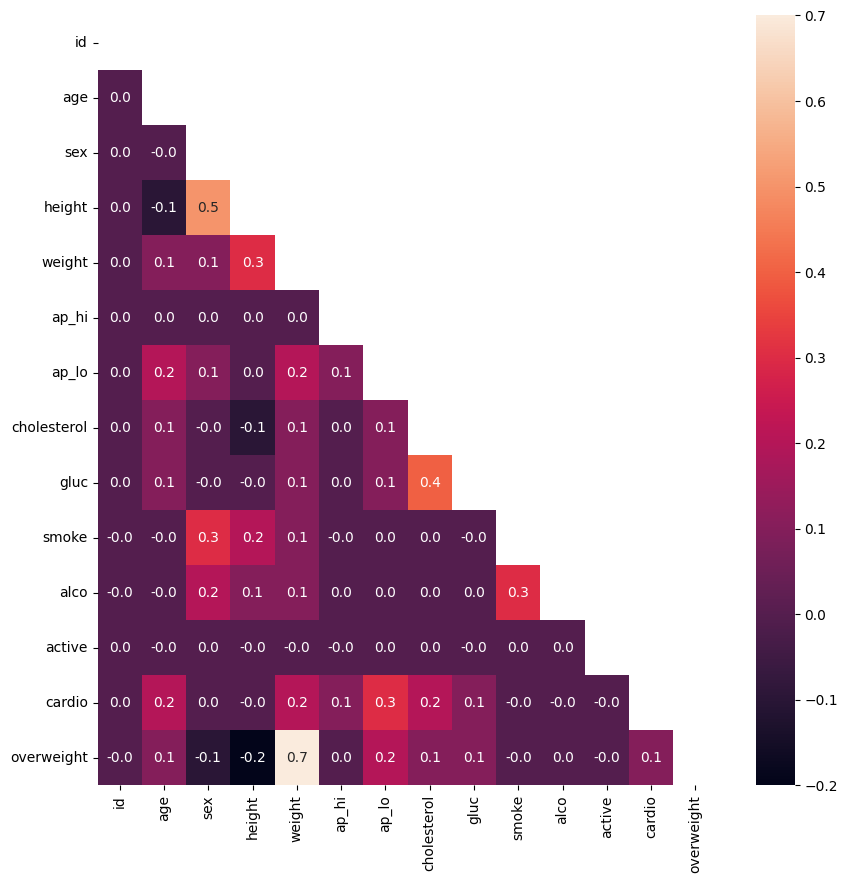

In [65]:
corr = df.corr().round(1)
mask = np.triu(np.ones_like(corr, dtype=bool))
heat = plt.subplots(figsize=(10,10))
heat = sns.heatmap(corr ,mask = mask, annot=True, fmt='.1f')

In [20]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [78]:
df2 = pd.melt(df,id_vars='cardio', value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

In [79]:
df2.tail()

,cardio,variable,value
378751,1,smoke,0
378752,1,smoke,0
378753,0,smoke,1
378754,1,smoke,0
378755,0,smoke,0


In [ ]:
df3 = pd.pivot_table(df2, index={'cardio', 'variable','value'}, aggfunc='count')
df3

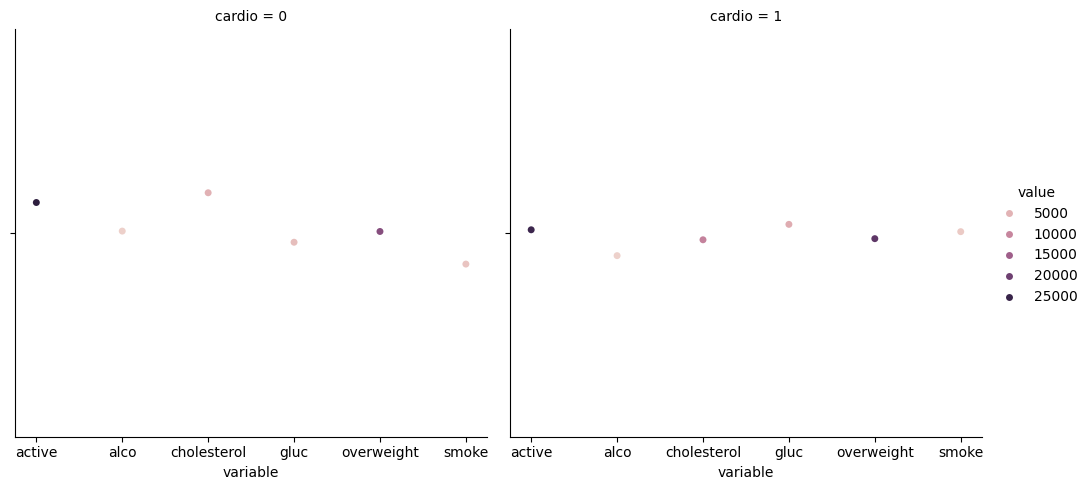

In [86]:
fig = sns.catplot(x='variable', data=df3, hue='value', col='cardio', )

In [93]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [104]:
df_cat = pd.melt(df,id_vars='cardio', value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
378751,1,smoke,0
378752,1,smoke,0
378753,0,smoke,1
378754,1,smoke,0


In [110]:
df_cat['ticks'] = 1
df_cat

,cardio,variable,value,ticks
0,0,active,1,1
1,1,active,1,1
2,1,active,0,1
3,1,active,1,1
4,0,active,0,1
...,...,...,...,...
378751,1,smoke,0,1
378752,1,smoke,0,1
378753,0,smoke,1,1
378754,1,smoke,0,1


In [118]:
df_cat2 = pd.pivot_table(df_cat, index=['cardio','variable','value'] ,aggfunc='count')
df_cat2

ticks
cardio variable    value       
0      active      0       5819
                   1      26172
       alco        0      30236
                   1       1755
       cholesterol 0      26909
                   1       5082
       gluc        0      28287
                   1       3704
       overweight  0      14324
                   1      17667
       smoke       0      29052
                   1       2939
1      active      0       6583
                   1      24552
       alco        0      29577
                   1       1558
       cholesterol 0      20742
                   1      10393
       gluc        0      25574
                   1       5561
       overweight  0       9626
                   1      21509
       smoke       0      28637
                   1       2498

In [123]:
df_cat2.reset_index(inplace=True)
df_cat2

,cardio,variable,value,ticks
0,0,active,0,5819
1,0,active,1,26172
2,0,alco,0,30236
3,0,alco,1,1755
4,0,cholesterol,0,26909
5,0,cholesterol,1,5082
6,0,gluc,0,28287
7,0,gluc,1,3704
8,0,overweight,0,14324
9,0,overweight,1,17667


In [127]:
df_cat2.rename(columns={'ticks':'total'}, inplace=True)
df_cat2

,cardio,variable,value,total
0,0,active,0,5819
1,0,active,1,26172
2,0,alco,0,30236
3,0,alco,1,1755
4,0,cholesterol,0,26909
5,0,cholesterol,1,5082
6,0,gluc,0,28287
7,0,gluc,1,3704
8,0,overweight,0,14324
9,0,overweight,1,17667


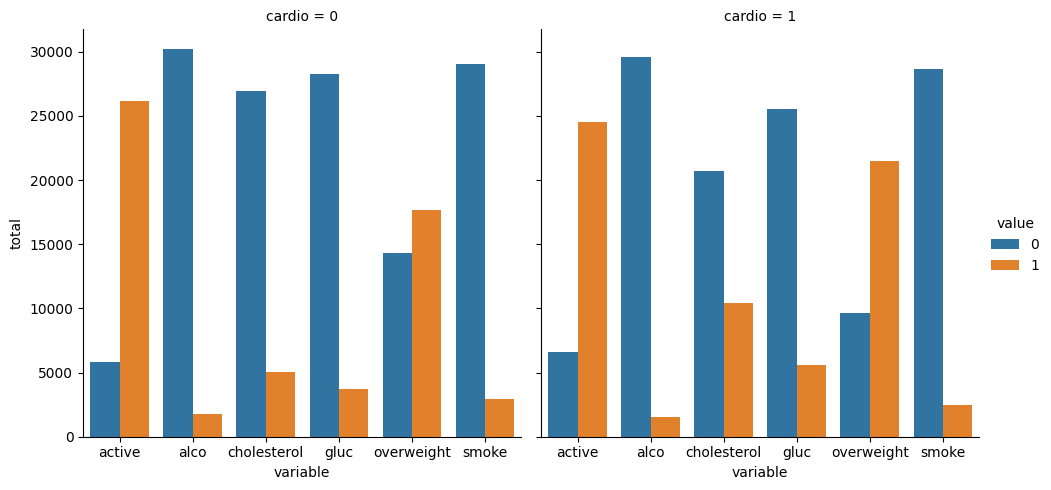

In [128]:
g = sns.catplot(x='variable', y='total',kind='bar', data=df_cat2, hue='value', col='cardio', )